In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
from collections import defaultdict


class Kmeans():

    def __init__(self, X, no_of_clusters: int, init_centeroids=None,
                 iterations=3,norm=2,automatic=True):  # X has number of rows equal obervation, number of columns equals dimnesion X.shape=[obervation,dimension]
        """
        Parameters
        ----------
        X : list[list[float]]
            design matrix
        no_of_clusters : int
            the number of desired clusters
        init_centeroids : list[list[float]], optional
            given centroids
        iterations : int, optional
            number of desired iterations
        norm : int, optional
            which norm to use for the distance function
        """
        np.random.seed(0)
        self.X = np.array(X)
        self.cluster_labels = None
        self.no_of_clusters = no_of_clusters
        self.no_of_dimensions = self.X.shape[1]
        self.no_of_points = self.X.shape[0]
        self.iterations = iterations
        self.list_centroids = []
        self.mse_error = []
        self.norm = norm
        if init_centeroids == None:
            self.init_centroids = self.init_clusters()
        else:
            assert np.array(init_centeroids).shape == (
            self.no_of_clusters, self.no_of_dimensions), "Given centroids do not match shape"
            self.init_centroids = init_centeroids

    def fit(self):
        labels = self.compute()
        cluster_dict = defaultdict(list)
        n = 0
        print("Iteration {}, ".format(n),"Centroids {}, ".format(self.get_centroids()),"Labels {}, ".format(labels.reshape(1,-1)))
        while True:
            n += 1
            old_centroids = self.get_centroids().copy()
            for i in range(self.no_of_points):
                # print(labels[i])
                cluster_dict[labels[i][0]].append(self.X[i])
            # print(np.array(cluster_dict[labels[0][0]]))
            for cluster, points in cluster_dict.items():
                if points: # check if each cluster has at least one point then find the mean and assign new centroid
                    self.init_centroids[cluster] = np.mean(np.array(points), axis=0)
            new_centroids = self.get_centroids().copy()
            for i in range(self.no_of_clusters):
                cluster_dict[i].clear()
                # print(np.mean(np.array(points),axis=0))
            labels = self.compute()
            # used to keep track of centroid iterations
            print("Iteration {}, ".format(n),"Centroids {}, ".format(self.get_centroids()),"Labels {}, ".format(labels.reshape(1,-1)))
            self.list_centroids.append(["Iteration {}".format(n),self.get_centroids(),list(labels.reshape(1,-1))])
            
            if np.where(np.isclose(old_centroids, new_centroids)) and n >= max(self.iterations,
                                                                               3):  # some stupid issue causes nan numbers to appear in early iterations of kmeans
                break
            # if np.where( np.abs(old_centroids-self.get_centroids()) < self.epsilon ):
            #  break

    def compute(self):
        cluster_list = []
        error=0
        for i in range(len(self.init_centroids)):
            X = norm(self.X - self.init_centroids[i], self.norm, axis=1).reshape(-1, 1)
            cluster_list.append(X)
            error+=np.sum(X)
        self.mse_error.append(error)
        self.cluster_labels = np.argmin(np.array(cluster_list), axis=0)

        return self.cluster_labels

    def init_clusters(self):  # This function does the job of choosing an approperiate centroid uniformely
        dump = []
        X_min = np.min(self.X, axis=1)
        X_max = np.max(self.X, axis=1)

        for i in range(self.no_of_dimensions):
            dump.append(np.random.uniform(size=(self.no_of_clusters), low=X_min[i], high=X_max[i]))

        return np.array(dump).T

    def get_centroids(self):
        return self.init_centroids

    def get_cluster_labels(self):
        return self.cluster_labels

    def get_points(self):
        return self.X

    def get_iterative_centroids(self):
        return self.list_centroids
    
    def get_error_per_iteration(self):
        return self.mse_error,self.norm

    def shake_point(self):
        # change the centroids location uniformly to see if possible to minimize error even further
        pass

Iteration 0,  Centroids [[1.         1.7118274 ]
 [1.         1.82294706]
 [1.         1.71879361]
 [1.         1.9458865 ]],  Labels [[0 3 3 3 3 3 3 3 3 3]], 
Iteration 1,  Centroids [[1.         1.        ]
 [1.         1.82294706]
 [1.         1.71879361]
 [6.05555556 4.55555556]],  Labels [[0 1 1 3 3 3 3 3 3 3]], 
Iteration 2,  Centroids [[1.         1.        ]
 [2.25       3.        ]
 [1.         1.71879361]
 [7.14285714 5.        ]],  Labels [[0 2 1 3 1 3 3 3 3 3]], 
Iteration 3,  Centroids [[1.   1.  ]
 [3.25 4.5 ]
 [1.5  2.  ]
 [7.75 5.  ]],  Labels [[0 2 1 1 1 1 3 3 3 1]], 


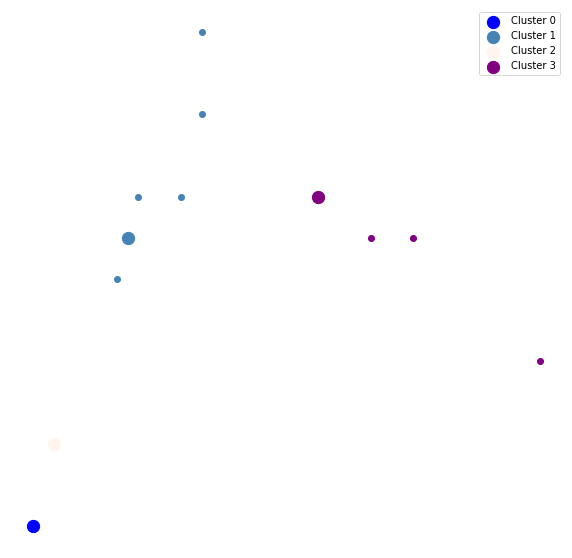

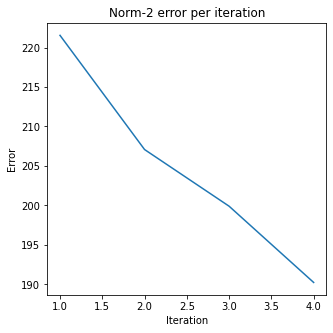

In [2]:
#s = Kmeans([[1, 1,1], [1.5, 2,2], [3, 4,4], [5, 7,7], [3.5, 5,5], [4.5, 5,5], [10, 4.5,4.5],[9, 4.5,4.5],[13, 3,3],[5, 6,6]], 4)
s = Kmeans([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5], [10, 4.5],[9, 4.5],[13, 3],[5, 6]], 4)
s.fit()
labels = s.get_cluster_labels()
points = s.get_points()
centers = s.get_centroids()
fig = plt.figure(figsize=(10, 10))
colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(colors)
# print(colors) # list of css4 colors, needs better clear colors
for i, j in enumerate(centers):
    plt.scatter(j[0], j[1], s=150, color=colors[i], label="Cluster {}".format(i));
plt.legend()
for i, j in enumerate(points):
    plt.scatter(j[0], j[1], color=colors[labels[i][0]]);
plt.axis("off")
error_info=s.get_error_per_iteration()
fig = plt.figure(figsize=(5, 5))
plt.plot(range(1,len(error_info[0])+1),error_info[0])
plt.title("Norm-{} error per iteration".format(error_info[1]));
plt.xlabel("Iteration");
plt.ylabel("Error");
# print(s.get_cluster_labels())
# print(s.get_iterative_centroids())